#1. Εισαγωγή δεδομένων και προεργασία

In [ ]:
import pandas as pd
from IPython.display import Markdown

In [ ]:
df_training = pd.read_csv('/content/isolet1+2+3+4.data')
df_testing = pd.read_csv('/content/isolet5.data')

df_training.dropna(inplace=True)
df_testing.dropna(inplace=True)

The target variable values that are present in the data set are [1.0 - 26.0]

[(2.0, 300), (3.0, 300), (4.0, 300), (5.0, 300), (7.0, 300), (8.0, 300), (9.0, 300), (10.0, 300), (11.0, 300), (12.0, 300), (14.0, 300), (15.0, 300), (16.0, 300), (17.0, 300), (18.0, 300), (19.0, 300), (20.0, 300), (21.0, 300), (22.0, 300), (23.0, 300), (24.0, 300), (25.0, 300), (26.0, 300), (13.0, 299), (1.0, 298), (6.0, 298)]


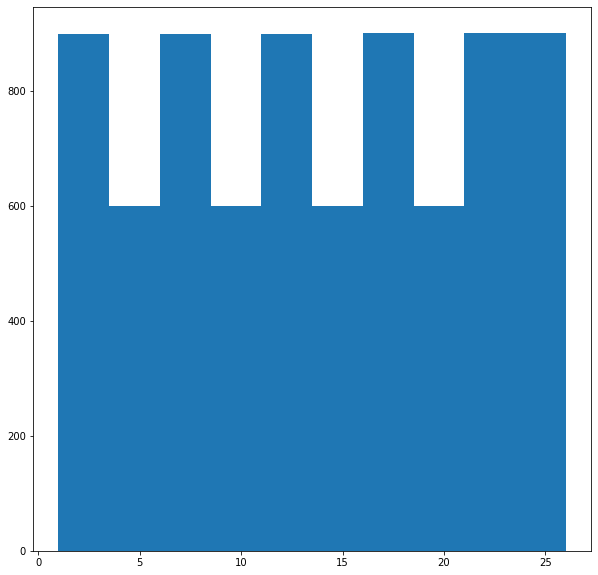

In [ ]:
import matplotlib.pyplot as plt

list_targets = df_training.iloc[:, -1].tolist()


def minmax(alist, flag):
    min_value = min(alist)
    max_value = max(alist)

    if flag:
        print(f"The target variable values that are present in the data set are [{min_value} - {max_value}]\n")
    else: 
        print(f"The independent variable values that are present in the data set are [{min_value} - {max_value}]\n")

minmax(list_targets, 1)

list_targets_testing = df_testing.iloc[:, -1].tolist()
united_list = list_targets + list_targets_testing

def counterElem(alist):

    locDic = {}
    for j in alist:
        if j in locDic:
            locDic[j] += 1
        else:
            locDic[j] = 1

    return locDic

print(sorted(counterElem(united_list).items(),key = lambda x:x[1], reverse = True))

plt.figure(figsize = (10, 10))
plt.hist(united_list, bins = 10)
plt.show()
print("\n")

In [ ]:
list_targets2 = df_training.iloc[:, :-2]
minmax(list_targets2, 0)

The independent variable values that are present in the data set are [ -0.0034 - -0.4394]



#2. Συσταδοποιήση

##k-Means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(26)
kmeans_clustering = kmeans.fit(df_training)


#plt.subplot(2,2)
#plt.scatter(df_training[:,0], df_training[:,1])

silhouette_score(df_training, kmeans_clustering.labels_)

0.14324305851213173

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(26)
agglomer_clustering = agglo.fit(df_training)

silhouette_score(df_training, agglomer_clustering.labels_)

0.14110271673502572

Πολύ κακό silhouette_score, απο αυτό εύκολα μπορεί να συμπεράνει κανείς οτι είναι κακή η ποιότητα των συσταδοποιήσεων. Τα δεδομένα μας δεν έχουν τόσο μεγάλη απόσταση, για να μπορούν να διαχωριστούν τόσο λεπτομερώς. Γενικότερα ο ορισμός μεγάλου αριθμού συστάδων κάνει πιο δύσκολη την διαδικασία της συσταδοποιήσης.

#3. Ταξινόμηση

## k-NN

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import time

starting_time = time.time()

X = df_training.iloc[:, :-2]
y = df_training.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

params = {
            'kNNClassifier__n_neighbors':   range(1,10),
            'kNNClassifier__weights':   ['uniform', 'distance']
        }

knn_pipeline=Pipeline([('Scaler',  StandardScaler()),
            ('kNNClassifier', KNeighborsClassifier())])


grid = GridSearchCV(estimator = knn_pipeline, cv= 5,  param_grid = params)

grid.fit(X_train, y_train)
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

finish_time = time.time()
elapsed_time = finish_time - starting_time

display(Markdown(
    "### Αποτελέσματα k-nearest neighbors classification:\n" +
    "**Best k**: {}".format(grid.best_params_['kNNClassifier__n_neighbors'])  + "<br>" +
    "**Best Cross-Val Accuracy**: {:.2f}".format(grid.best_score_) + "<br>" +
    "**Test Set 1-Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Time taken to execute**: {:.2f}".format(elapsed_time) + "<br>"
))

### Αποτελέσματα k-nearest neighbors classification:
**Best k**: 9<br>**Best Cross-Val Accuracy**: 0.88<br>**Test Set 1-Accuracy**: 0.90<br>**Time taken to execute**: 26.70<br>

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
import time
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log_reg_pipeline=Pipeline([('Scaler',  StandardScaler()),
            ('LogRegClassifier', LogisticRegression(max_iter=1000))])

starting_time = time.time()

params = { 
            'LogRegClassifier__C': np.logspace(-6, 4, 20)
         }

grid = GridSearchCV(estimator=log_reg_pipeline, cv = 10, param_grid=params)

grid.fit(X_train, y_train) 
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

finish_time = time.time()
elapsed_time = finish_time - starting_time

display(Markdown(
    "### Αποτελέσματα λογιστικής παλινδρόμησης:\n" +
    "**Best lambda**: {:.3f}".format(grid.best_params_['LogRegClassifier__C'])  + "<br>" +
    "**Test Set 1-Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Time taken to execute**: {:.2f}".format(elapsed_time) + "<br>"
))

### Αποτελέσματα λογιστικής παλινδρόμησης:
**Best lambda**: 0.016<br>**Test Set 1-Accuracy**: 0.95<br>**Time taken to execute**: 2148.08<br>

#4. PCA

## Εφαρμογή PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.8, svd_solver = 'full').fit(X_train)

print(f"The number of components needed was: {pca.n_components_}")

The number of components needed was: 48


## Προβολή των δεδομένων στις νέες διαστάσεις

In [ ]:
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

## Εφαρμογή των δεδομένων σε Log. Regression

In [ ]:
scaler_tans = StandardScaler().fit(X_train_trans)
X_train_trans = scaler_tans.transform(X_train_trans)
X_test_trans = scaler_tans.transform(X_test_trans)

starting_time = time.time()

log_reg_pipeline=Pipeline([('Scaler',  StandardScaler()),
            ('LogRegClassifier', LogisticRegression(max_iter=10000))])


params = { 
            'LogRegClassifier__C': np.logspace(-6, 4, 20)
         }


grid = GridSearchCV(estimator=log_reg_pipeline, cv = 10, param_grid=params)

grid.fit(X_train_trans, y_train) 
y_train_pred = grid.predict(X_train_trans)
y_test_pred = grid.predict(X_test_trans)

finish_time = time.time()
elapsed_time = finish_time - starting_time

display(Markdown(
    "### Αποτελέσματα λογιστικής παλινδρόμησης:\n" +
    "**Best lambda**: {:.3f}".format(grid.best_params_['LogRegClassifier__C'])  + "<br>" +
    "**Test Set 1-Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Time taken to execute**: {:.2f}".format(elapsed_time) + "<br>"
))

### Αποτελέσματα λογιστικής παλινδρόμησης:
**Best lambda**: 0.616<br>**Test Set 1-Accuracy**: 0.94<br>**Time taken to execute**: 986.84<br>

Υπήρξε τρομερό όφελος στον χρόνο εκπαίδευσης, καθώς σε 10000 max_iter η λογιστική παλινδρόμηση μετά την μείωση των διαστάσεων έκανε μολις 986.84 sec. Ενώ πριν την χρήση του PCA με μόλις το 1/10 του αριθμού των max_iter έκανε 2148.08 sec. (Τρέμω να βάλω τον ίδιο αριθμό max_iter και στην πρώτη εφαρμογή της λογιστικής παλινδρόμησης αλλά νομίζω τα αποτελέσματα θα ήταν ολοφάνερα)

Το Error Rate απο όσο φαίνεται δεν είχε μείωση 